## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

W0828 16:26:10.062484  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 16:26:10.732552  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 16:26:11.103589  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0828 16:26:16.203098  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0828 16:26:16.459124  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0828 16:26:20.520530  4640 deprecation.py:323] From D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 16:26:20.567535  4640 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.9175 - acc: 0.3063 - val_loss: 1.7424 - val_acc: 0.3792
Epoch 2/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6902 - acc: 0.3969 - val_loss: 1.6037 - val_acc: 0.4283
Epoch 3/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.6078 - acc: 0.4246 - val_loss: 1.5675 - val_acc: 0.4444
Epoch 4/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.5345 - acc: 0.4532 - val_loss: 1.5323 - val_acc: 0.4543
Epoch 5/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.4890 - acc: 0.4694 - val_loss: 1.4980 - val_acc: 0.4533
Epoch 6/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.4673 - acc: 0.4780 - val_loss: 1.5215 - val_acc: 0.4474
Epoch 7/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.4273 - acc: 0.4926 - val_loss: 1.

50000/50000 [==============================] - 7s 141us/step - loss: 0.5378 - acc: 0.8067 - val_loss: 2.0514 - val_acc: 0.5196
Epoch 60/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.5346 - acc: 0.8076 - val_loss: 2.0671 - val_acc: 0.5181
Epoch 61/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.5112 - acc: 0.8164 - val_loss: 2.1354 - val_acc: 0.5052
Epoch 62/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.5037 - acc: 0.8190 - val_loss: 2.2034 - val_acc: 0.4996
Epoch 63/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.5059 - acc: 0.8180 - val_loss: 2.1254 - val_acc: 0.5228
Epoch 64/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.4919 - acc: 0.8240 - val_loss: 2.1276 - val_acc: 0.5129
Epoch 65/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.4749 - acc: 0.8294 - val_loss: 2.1925 - val_acc: 0.5148
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 136us/step - loss: 0.2322 - acc: 0.9160 - val_loss: 3.4047 - val_acc: 0.5035
Epoch 118/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.2523 - acc: 0.9077 - val_loss: 3.3283 - val_acc: 0.5074
Epoch 119/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.2328 - acc: 0.9162 - val_loss: 3.4516 - val_acc: 0.4985
Epoch 120/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2574 - acc: 0.9073 - val_loss: 3.4248 - val_acc: 0.5080
Epoch 121/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2419 - acc: 0.9124 - val_loss: 3.3759 - val_acc: 0.5035
Epoch 122/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.2215 - acc: 0.9208 - val_loss: 3.4316 - val_acc: 0.5110
Epoch 123/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.2197 - acc: 0.9215 - val_loss: 3.4717 - val_acc: 0.5004
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 153us/step - loss: 0.1263 - acc: 0.9556 - val_loss: 4.1518 - val_acc: 0.5027
Epoch 176/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.1793 - acc: 0.9376 - val_loss: 4.1870 - val_acc: 0.4946
Epoch 177/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2005 - acc: 0.9308 - val_loss: 4.1950 - val_acc: 0.4921
Epoch 178/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.2139 - acc: 0.9266 - val_loss: 4.0992 - val_acc: 0.5006
Epoch 179/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1440 - acc: 0.9488 - val_loss: 4.1619 - val_acc: 0.5004
Epoch 180/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1368 - acc: 0.9515 - val_loss: 4.1765 - val_acc: 0.4962
Epoch 181/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1204 - acc: 0.9565 - val_loss: 4.1157 - val_acc: 0.4987
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 144us/step - loss: 0.1672 - acc: 0.9430 - val_loss: 4.5006 - val_acc: 0.4997
Epoch 234/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1517 - acc: 0.9485 - val_loss: 4.5574 - val_acc: 0.4947
Epoch 235/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.1108 - acc: 0.9609 - val_loss: 4.5217 - val_acc: 0.4998
Epoch 236/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1090 - acc: 0.9624 - val_loss: 4.6362 - val_acc: 0.4989
Epoch 237/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1493 - acc: 0.9489 - val_loss: 4.6111 - val_acc: 0.4862
Epoch 238/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.1879 - acc: 0.9384 - val_loss: 4.5454 - val_acc: 0.4953
Epoch 239/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0938 - acc: 0.9666 - val_loss: 4.6278 - val_acc: 0.5000
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 140us/step - loss: 0.1151 - acc: 0.9608 - val_loss: 4.8830 - val_acc: 0.4834
Epoch 292/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.1230 - acc: 0.9579 - val_loss: 4.9194 - val_acc: 0.4905
Epoch 293/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.1362 - acc: 0.9548 - val_loss: 4.8137 - val_acc: 0.5015
Epoch 294/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0867 - acc: 0.9712 - val_loss: 4.8445 - val_acc: 0.4992
Epoch 295/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.0694 - acc: 0.9756 - val_loss: 4.8745 - val_acc: 0.5006
Epoch 296/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1343 - acc: 0.9544 - val_loss: 4.8546 - val_acc: 0.4922
Epoch 297/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.2184 - acc: 0.9311 - val_loss: 4.7705 - val_acc: 0.4965
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.0590 - acc: 0.9793 - val_loss: 4.9523 - val_acc: 0.4972
Epoch 350/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0318 - acc: 0.9892 - val_loss: 5.0368 - val_acc: 0.5022
Epoch 351/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0792 - acc: 0.9736 - val_loss: 5.1181 - val_acc: 0.4882
Epoch 352/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.2018 - acc: 0.9386 - val_loss: 5.0816 - val_acc: 0.4867
Epoch 353/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1828 - acc: 0.9432 - val_loss: 4.9346 - val_acc: 0.4900
Epoch 354/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0528 - acc: 0.9821 - val_loss: 4.9545 - val_acc: 0.4994
Epoch 355/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0469 - acc: 0.9839 - val_loss: 4.9702 - val_acc: 0.4980
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.1259 - acc: 0.9600 - val_loss: 4.9961 - val_acc: 0.4985
Epoch 408/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0932 - acc: 0.9688 - val_loss: 5.1146 - val_acc: 0.4959
Epoch 409/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0339 - acc: 0.9887 - val_loss: 5.0900 - val_acc: 0.4987
Epoch 410/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0277 - acc: 0.9910 - val_loss: 5.1091 - val_acc: 0.5008
Epoch 411/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0169 - acc: 0.9951 - val_loss: 5.1453 - val_acc: 0.4999
Epoch 412/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1733 - acc: 0.9488 - val_loss: 5.2428 - val_acc: 0.4813
Epoch 413/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1996 - acc: 0.9409 - val_loss: 5.1001 - val_acc: 0.4911
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 7s 133us/step - loss: 0.1207 - acc: 0.9623 - val_loss: 5.3017 - val_acc: 0.4875
Epoch 466/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1992 - acc: 0.9436 - val_loss: 5.2361 - val_acc: 0.4922
Epoch 467/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0984 - acc: 0.9686 - val_loss: 5.2363 - val_acc: 0.4929
Epoch 468/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0681 - acc: 0.9777 - val_loss: 5.2890 - val_acc: 0.4965
Epoch 469/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0225 - acc: 0.9930 - val_loss: 5.2315 - val_acc: 0.5007
Epoch 470/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0088 - acc: 0.9979 - val_loss: 5.2085 - val_acc: 0.5056
Epoch 471/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0067 - acc: 0.9987 - val_loss: 5.2626 - val_acc: 0.5054
Epoch 472/500
50000/50000 [

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [10]:
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.2531 - val_acc: 0.5055
Epoch 2/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 5.2568 - val_acc: 0.5054
Epoch 3/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2601 - val_acc: 0.5052
Epoch 4/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 5.2630 - val_acc: 0.5057
Epoch 5/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 5.2658 - val_acc: 0.5059
Epoch 6/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2686 - val_acc: 0.5060
Epoch 7/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2718 -

50000/50000 [==============================] - 4s 87us/step - loss: 7.9809e-04 - acc: 1.0000 - val_loss: 5.3500 - val_acc: 0.5042
Epoch 59/500
50000/50000 [==============================] - 4s 88us/step - loss: 7.9365e-04 - acc: 1.0000 - val_loss: 5.3515 - val_acc: 0.5045
Epoch 60/500
50000/50000 [==============================] - 4s 87us/step - loss: 7.8999e-04 - acc: 1.0000 - val_loss: 5.3524 - val_acc: 0.5042
Epoch 61/500
50000/50000 [==============================] - 4s 87us/step - loss: 7.8571e-04 - acc: 1.0000 - val_loss: 5.3533 - val_acc: 0.5043
Epoch 62/500
50000/50000 [==============================] - 4s 87us/step - loss: 7.8211e-04 - acc: 1.0000 - val_loss: 5.3545 - val_acc: 0.5045 ETA: 0s - loss: 7.7837e-04 -
Epoch 63/500
50000/50000 [==============================] - 4s 87us/step - loss: 7.7834e-04 - acc: 1.0000 - val_loss: 5.3557 - val_acc: 0.5042
Epoch 64/500
50000/50000 [==============================] - 4s 87us/step - loss: 7.7431e-04 - acc: 1.0000 - val_loss: 5.3569 -

Epoch 115/500
50000/50000 [==============================] - 4s 87us/step - loss: 6.2901e-04 - acc: 1.0000 - val_loss: 5.4040 - val_acc: 0.5043
Epoch 116/500
50000/50000 [==============================] - 4s 87us/step - loss: 6.2672e-04 - acc: 1.0000 - val_loss: 5.4050 - val_acc: 0.5044
Epoch 117/500
50000/50000 [==============================] - 4s 87us/step - loss: 6.2459e-04 - acc: 1.0000 - val_loss: 5.4058 - val_acc: 0.5044
Epoch 118/500
50000/50000 [==============================] - 4s 87us/step - loss: 6.2232e-04 - acc: 1.0000 - val_loss: 5.4066 - val_acc: 0.5042acc:
Epoch 119/500
50000/50000 [==============================] - 4s 87us/step - loss: 6.2022e-04 - acc: 1.0000 - val_loss: 5.4077 - val_acc: 0.5043
Epoch 120/500
50000/50000 [==============================] - 4s 88us/step - loss: 6.1838e-04 - acc: 1.0000 - val_loss: 5.4083 - val_acc: 0.5046
Epoch 121/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.1610e-04 - acc: 1.0000 - val_loss: 5.4092 - val_

Epoch 172/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.2605e-04 - acc: 1.0000 - val_loss: 5.4453 - val_acc: 0.5048
Epoch 173/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.2466e-04 - acc: 1.0000 - val_loss: 5.4459 - val_acc: 0.5047
Epoch 174/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.2315e-04 - acc: 1.0000 - val_loss: 5.4465 - val_acc: 0.5051
Epoch 175/500
50000/50000 [==============================] - 4s 88us/step - loss: 5.2176e-04 - acc: 1.0000 - val_loss: 5.4471 - val_acc: 0.5051
Epoch 176/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.2029e-04 - acc: 1.0000 - val_loss: 5.4479 - val_acc: 0.5049
Epoch 177/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.1890e-04 - acc: 1.0000 - val_loss: 5.4483 - val_acc: 0.5053
Epoch 178/500
50000/50000 [==============================] - 4s 87us/step - loss: 5.1732e-04 - acc: 1.0000 - val_loss: 5.4492 - val_acc:

50000/50000 [==============================] - 4s 88us/step - loss: 4.5539e-04 - acc: 1.0000 - val_loss: 5.4782 - val_acc: 0.5045
Epoch 229/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.5431e-04 - acc: 1.0000 - val_loss: 5.4788 - val_acc: 0.5048 ETA: 0s - loss: 4.5575e-04 - acc: 1.
Epoch 230/500
50000/50000 [==============================] - 4s 87us/step - loss: 4.5320e-04 - acc: 1.0000 - val_loss: 5.4793 - val_acc: 0.5049
Epoch 231/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.5212e-04 - acc: 1.0000 - val_loss: 5.4797 - val_acc: 0.5046
Epoch 232/500
50000/50000 [==============================] - 4s 89us/step - loss: 4.5110e-04 - acc: 1.0000 - val_loss: 5.4802 - val_acc: 0.5049
Epoch 233/500
50000/50000 [==============================] - 4s 87us/step - loss: 4.5009e-04 - acc: 1.0000 - val_loss: 5.4809 - val_acc: 0.5050
Epoch 234/500
50000/50000 [==============================] - 4s 87us/step - loss: 4.4898e-04 - acc: 1.0000 - val_

Epoch 285/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.0134e-04 - acc: 1.0000 - val_loss: 5.5074 - val_acc: 0.5044
Epoch 286/500
50000/50000 [==============================] - 4s 87us/step - loss: 4.0051e-04 - acc: 1.0000 - val_loss: 5.5077 - val_acc: 0.5044
Epoch 287/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.9972e-04 - acc: 1.0000 - val_loss: 5.5083 - val_acc: 0.5043
Epoch 288/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.9884e-04 - acc: 1.0000 - val_loss: 5.5090 - val_acc: 0.5043
Epoch 289/500
50000/50000 [==============================] - 4s 88us/step - loss: 3.9803e-04 - acc: 1.0000 - val_loss: 5.5094 - val_acc: 0.5044
Epoch 290/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.9714e-04 - acc: 1.0000 - val_loss: 5.5098 - val_acc: 0.5045
Epoch 291/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.9645e-04 - acc: 1.0000 - val_loss: 5.5102 - val_acc:

Epoch 342/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5909e-04 - acc: 1.0000 - val_loss: 5.5326 - val_acc: 0.5041
Epoch 343/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5843e-04 - acc: 1.0000 - val_loss: 5.5330 - val_acc: 0.5041
Epoch 344/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5766e-04 - acc: 1.0000 - val_loss: 5.5335 - val_acc: 0.5039
Epoch 345/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5714e-04 - acc: 1.0000 - val_loss: 5.5340 - val_acc: 0.5038
Epoch 346/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5651e-04 - acc: 1.0000 - val_loss: 5.5343 - val_acc: 0.5038
Epoch 347/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5582e-04 - acc: 1.0000 - val_loss: 5.5348 - val_acc: 0.5040
Epoch 348/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.5522e-04 - acc: 1.0000 - val_loss: 5.5352 - val_acc:

Epoch 399/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2508e-04 - acc: 1.0000 - val_loss: 5.5553 - val_acc: 0.5038
Epoch 400/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2457e-04 - acc: 1.0000 - val_loss: 5.5556 - val_acc: 0.5037
Epoch 401/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2401e-04 - acc: 1.0000 - val_loss: 5.5559 - val_acc: 0.5037
Epoch 402/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2350e-04 - acc: 1.0000 - val_loss: 5.5565 - val_acc: 0.5037
Epoch 403/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2299e-04 - acc: 1.0000 - val_loss: 5.5568 - val_acc: 0.5037
Epoch 404/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2239e-04 - acc: 1.0000 - val_loss: 5.5571 - val_acc: 0.5037
Epoch 405/500
50000/50000 [==============================] - 4s 87us/step - loss: 3.2186e-04 - acc: 1.0000 - val_loss: 5.5575 - val_acc:

50000/50000 [==============================] - 4s 88us/step - loss: 2.9757e-04 - acc: 1.0000 - val_loss: 5.5752 - val_acc: 0.5034
Epoch 456/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9718e-04 - acc: 1.0000 - val_loss: 5.5754 - val_acc: 0.5033
Epoch 457/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9665e-04 - acc: 1.0000 - val_loss: 5.5758 - val_acc: 0.5037
Epoch 458/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9631e-04 - acc: 1.0000 - val_loss: 5.5760 - val_acc: 0.5037
Epoch 459/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9581e-04 - acc: 1.0000 - val_loss: 5.5764 - val_acc: 0.5035
Epoch 460/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9539e-04 - acc: 1.0000 - val_loss: 5.5767 - val_acc: 0.5033
Epoch 461/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.9495e-04 - acc: 1.0000 - val_loss: 5.5770 - val_acc: 0.5035
Epoch 

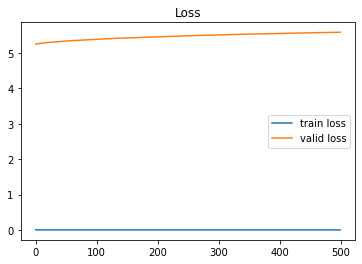

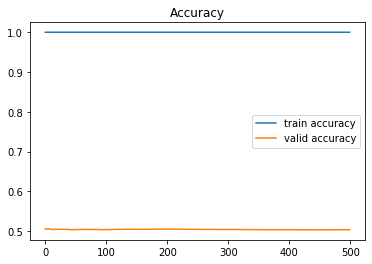

In [12]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()